# Display an Image using Matplotlib

* Opencv represents an image in BGR (Blue, Green, Red) plane order.
* MatplotLib represents an image in RGB (Red, Green, Blue) plane order.

Therefore in order to show an image using MatplotLib we need to convert the color planes. `cv.cvtColor` attribute is used for this with following arguments. 

```python
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
```


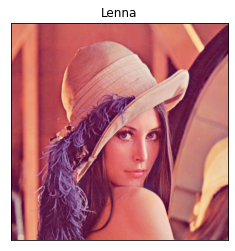

In [2]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Lenna.png', cv.IMREAD_COLOR) #Reading the image as a color image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) #color converting from BGR to RGB

fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Lenna')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Creating a GRAYSCALE image

* dtype = uint8 --> 8 bits are used to represent one pixel.
* so each pixel may take value in the range of 0 to 255. Alltogether 256 values
* If we assign a value greater than 255. It will take the (value%256) for that pixel. that is the modulo 

### In normal
* black = minimum alue available(0)
* white = maximum value available(value%256, 300%256 = 144 and pixel is white)

### After the  mapping using `vmin = 0` and `vmax = 255`
* black = 0
* white = 255
* In between = shades of gray(value%256, 300%256 = 144 and pixel is gray)

Value of the pixel at (3,2) =  44 



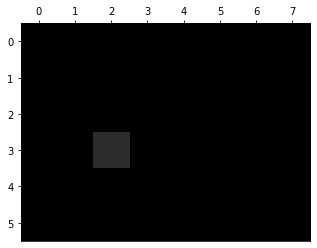

In [32]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = np.zeros((6,8), dtype=np.uint8)
img[3,2] = 300 #vlaue%256 will be assigned to the pixel that is 44. 
print("Value of the pixel at (3,2) = ", img[3,2],"\n")

fig, ax = plt.subplots()
ax.imshow(img, cmap = 'gray', vmin= 0, vmax=255) # color mapping
ax.xaxis.tick_top()
plt.show()

# Creating a COLOR Image

* A color image is a three, two dimensional arrays in 3D space. planes = R,G,B order
* Each cordinate in 2d array consists of three values [R ,G ,B]

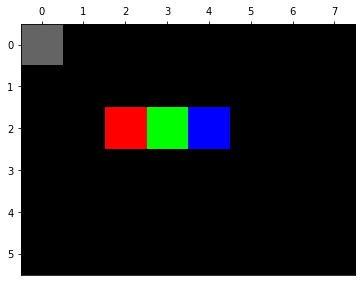

In [38]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#color image in 3D space three dimensions.

im = np.zeros((6,8,3), dtype = np.uint8)

im[2,2] = [255,0,0]
im[2,3] = [0,255,0]
im[2,4] = [0,0,255]

im[0,0] = [100,100,100]

fig,ax = plt.subplots(figsize=(6,8))
ax.imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax.xaxis.tick_top()
plt.show()

# Displaying an image with OpenCV's HighGUI


In [3]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Lenna.png', cv.IMREAD_COLOR)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

# Zeroing out the planes

* By setting the each pixel's value to be zero in a particular plane we can remove the effect of the corresponding color.
* Image is a combination of three color planes in the order of B, G, R.

|Plane|Index|
|:---:|:---:|
|B|0|
|G|1|
|R|2|

* `img[:,:,1:3] = 0` indicates zeroing all the elements in planes 1 and 2
* `img[pixels on axis1, pixels on axis2, planes]`

In [3]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Lenna.png', cv.IMREAD_COLOR)

print(img[2,5]) #  Befoe zeroing out G,R planes
img[:,:,[0,2]] = 0  #To look in blue. Zero out the G , R planes compltely 
print(img[2,5]) #After zeroing out G,R planes

cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

[116 129 226]
[  0 129   0]


# Change Brightness

* To change brightness we need to increse the pixel's value closer to 255.
* Because black = 0, white = 255

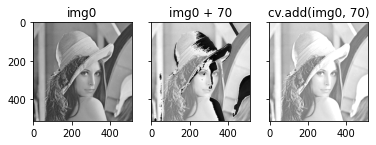

In [4]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Lenna.png', cv.IMREAD_GRAYSCALE)

img0 = cv.imread('Lenna.png', cv.IMREAD_GRAYSCALE) # Image is an array of numbers in the range [0,255]
img1 = img0 + 70  # Adding 50 to each of the pixel. Overflows can happen. value%256 (the modulo) will be assigned to the pixel in such a case.
img2 = cv.add(img0, 70) # No overflow. If the value exceeds 255. Value will be set to 255.(modulo is not considered)

fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey=True)

ax[0].imshow(img0, cmap ='gray', vmin = 0, vmax = 255)
ax[0].set_title('img0')
ax[1].imshow(img1, cmap ='gray', vmin = 0, vmax = 255)
ax[1].set_title('img0 + 70')
ax[2].imshow(img2, cmap ='gray', vmin = 0, vmax = 255)
ax[2].set_title('cv.add(img0, 70)')
plt.show()